In [1]:
# get the dataset and estimators
import sys, os
sys.path.append(os.path.abspath('..'))

from datasets.amazon_review import AmazonReviewDataset
from estimators import ALL_ESTIMATORS
from utils import plot_estimators_over_problems

import numpy as np
import pprint as pp

# get the dataset
dataset = AmazonReviewDataset(split_seed=2024)

estimator_names = ["true theta"] + list(ALL_ESTIMATORS.keys())
pp.pprint(estimator_names)

['true theta',
 'mle',
 'pred_mean',
 'vanilla_ppi',
 'power_tuned_ppi',
 'eb_sure',
 'shrink_var_ppi',
 'compound_ppi']


In [2]:
# actually compute the estimators and combine them with the true theta
estimators = [dataset.true_theta]

for estimator_name in estimator_names[1:]:
    estimators.append(ALL_ESTIMATORS[estimator_name](dataset))

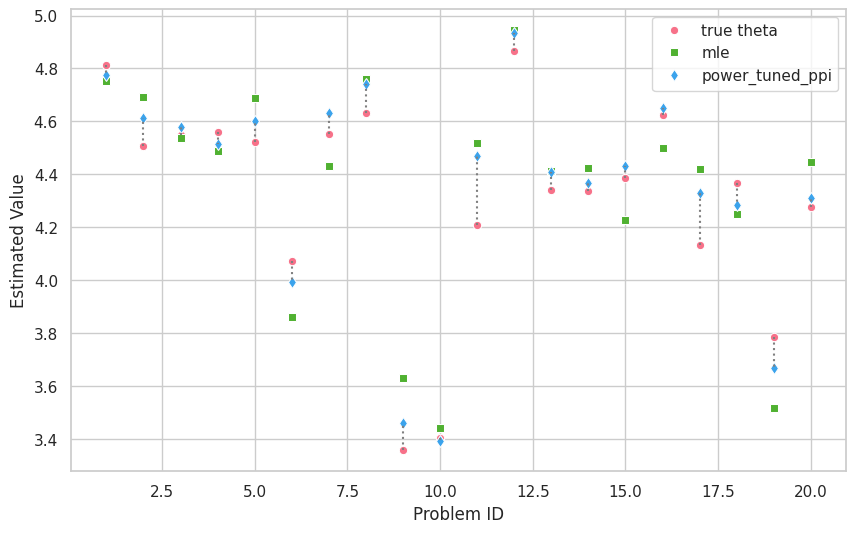

In [4]:
# some plotting
subset_idx = [0, 1, 4]

def plot_subset(estimators, estimator_names, subset_idx, links=[], problem_idx=np.arange(10)):
    subset_estimators = [estimators[i][problem_idx] for i in subset_idx]
    subset_estimator_names = [estimator_names[i] for i in subset_idx]
    plot_estimators_over_problems(subset_estimators, subset_estimator_names, links)

plot_subset(estimators, estimator_names, subset_idx, links=[(1, 3)], problem_idx=np.arange(10, 30))

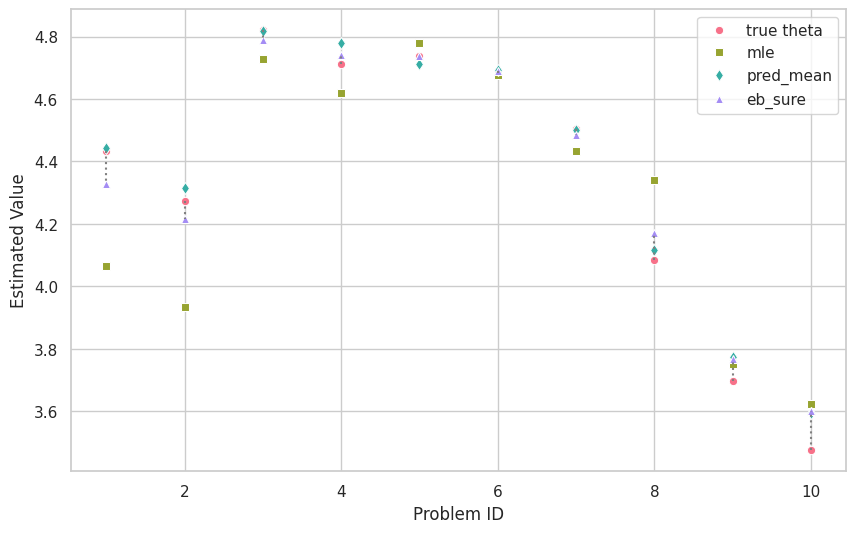

In [6]:
subset_idx2 = [0, 1, 2, 5]

plot_subset(estimators, estimator_names, subset_idx2, links=[(1, 4)], problem_idx=np.arange(40, 50))

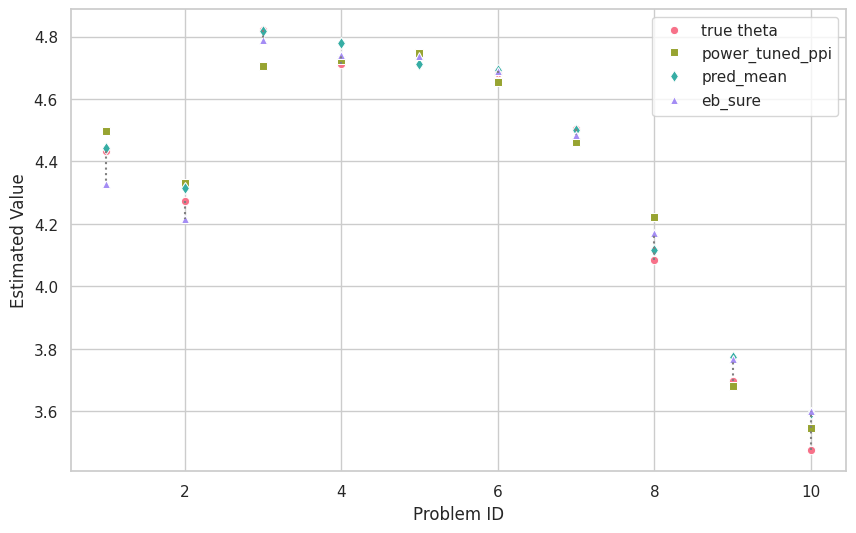

In [7]:
subset_idx3 = [0, 4, 2, 5]

plot_subset(estimators, estimator_names, subset_idx3, links=[(1, 4)], problem_idx=np.arange(40, 50))